Author: JONATHAN POLYN                                                                          
Course: DSC-540                                                                                  
Project: Ensemble Methods

In [32]:
# Importing the required packages.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import xgboost as xgb

In [2]:
# Setting the columns and rows to display max.
pd.set_option("display.max_rows", None, "display.max_columns", None)

Loading the datasets

In [4]:
# Loading the subject101 to work with it.
df01 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject101.dat",
    sep=' ')
# Loading the subject102 to work with it.
df02 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject102.dat",
    sep=' ')
# Loading the subject103 to work with it.
df03 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject103.dat",
    sep=' ')
# Loading the subject104 to work with it.
df04 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject104.dat",
    sep=' ')
# Loading the subject105 to work with it.
df05 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject105.dat",
    sep=' ')
# Loading the subject106 to work with it.
df06 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject106.dat",
    sep=' ')
# Loading the subject107 to work with it.
df07 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject107.dat",
    sep=' ')
# Loading the subject108 to work with it.
df08 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject108.dat",
    sep=' ')
# Loading the subject109 to work with it.
df09 = pd.read_table(
    "C:\School\DSC-540\Topic 8 -  Ensemble Methods\PAMAP2_Dataset\Protocol\subject109.dat",
    sep=' ')

In [5]:
#Random viewing the data - df05
df05.head()

5.7  0  NaN    34  2.22755  9.65418  2.38862  2.31968  9.60752  2.58278  \
0  5.71  0  NaN  34.0  2.37550  9.57647  2.31412  2.45657  9.62177  2.71852   
1  5.72  0  NaN  34.0  2.94208  9.53415  2.32275  2.78876  9.64961  2.76342   
2  5.73  0  NaN  34.0  3.47541  9.75837  2.40696  3.33080  9.66073  2.68734   
3  5.74  0  NaN  34.0  3.54617  9.83232  2.25382  3.67642  9.71848  2.50565   
4  5.75  0  NaN  34.0  4.03289  9.56229  2.18505  3.91692  9.71667  2.42990   

   0.0162711  -0.0364337  -0.159489  -35.3864  -66.5838   18.621         1  \
0  -0.103958    0.002556  -0.124706  -35.8832  -66.9292  19.1490  1.000000   
1  -0.049460    0.077645  -0.045531  -34.7545  -67.3621  18.6245  1.000000   
2   0.012200    0.138072  -0.016871  -34.5069  -67.3752  18.7553  1.000000   
3   0.051629    0.154942  -0.006620  -35.1327  -66.7217  18.2276  1.000000   
4   0.091075    0.226197   0.004551  -34.6292  -66.8730  17.7026 -0.369289   

        0.1      0.2      0.3  35.625  1.45391  5.87561  -7.88825  1.19502  \
0  0.000000  0.00000  0.00000  35.625  1.56970  5.98847  -7.84780  1.28692   
1  0.000000  0.00000  0.00000  35.625  1.52482  6.02469  -8.08106  1.39231   
2  0.000000  0.00000  0.00000  35.625  1.43944  6.02286  -8.39237  1.33117   
3  0.000000  0.00000  0.00000  35.625  1.24887  6.02345  -8.39582  1.19473   
4  0.477255  0.39907  0.69036  35.625  1.24847  5.87284  -8.39534  1.02883   

   5.89807  -7.82306  -0.179294  -0.183116  0.154623  -12.7692  -33.8073  \
0  5.97306  -7.62693  -0.159629  -0.127159  0.147688  -13.1666  -33.5351   
1  6.00303  -7.64259  -0.171019  -0.073535  0.132653  -12.8944  -34.1897   
2  6.03363  -7.83860  -0.165247  -0.133399  0.133739  -12.8979  -34.5770   
3  6.06441  -8.04926  -0.175486  -0.135239  0.141257  -12.6348  -34.3282   
4  6.08000  -8.13889  -0.235424  -0.155226  0.149075  -12.3897  -33.8217   

    18.707       1.1       0.4       0.5       0.6  33.5  8.97893  -3.11115  \
0  19.1257  1.000000  0.000000  0.000000  0.000000  33.5  9.16496  -3.11201   
1  18.8493  0.228238 -0.474889  0.814685  0.242231  33.5  9.00905  -3.03320   
2  19.4155  0.223200 -0.475113  0.816146  0.241569  33.5  9.12364  -3.22471   
3  18.8519  0.218865 -0.475258  0.817139  0.241893  33.5  9.19889  -3.14925   
4  19.1328  0.213328 -0.471458  0.819994  0.244598  33.5  9.11865  -3.33734   

   -2.68324   9.0945  -3.01117  -2.37605  -0.017907  0.00933956  0.050097  \
0  -2.71992  9.06418  -3.07175  -2.43623  -0.070091    0.002312  0.053832   
1  -2.95354  9.01897  -3.14743  -2.46602  -0.084468    0.034249  0.030462   
2  -2.83541  9.01885  -3.14746  -2.49629  -0.030789    0.058615  0.055252   
3  -2.83511  9.03428  -3.23808  -2.39013  -0.020063    0.020903  0.059653   
4  -2.98912  9.06458  -3.23800  -2.32975  -0.075081   -0.018107  0.029208   

   -32.7091  31.4772  44.2318  0.255373  0.783075  0.0846021  0.560732  
0  -33.0782  30.9814  44.5148  0.251163  0.785583   0.076319  0.560314  
1  -32.5619  30.6982  44.5169  0.250643  0.786419   0.072038  0.559941  
2  -32.8212  30.9690  44.6575  0.250917  0.786967   0.071013  0.559179  
3  -33.1869  30.0856  44.5154  0.249631  0.786602   0.066861  0.560777  
4  -33.0545  30.0803  44.9414  0.248325  0.785957   0.063366  0.562664

In [6]:
#Random viewing the data - df02
df02.head()

5.64  0    NaN    33  2.79143  7.55389  -7.06374  2.87553  7.88823  \
0  5.65  0    NaN  33.0  2.86086  7.43814  -7.21626  2.84248  7.63164   
1  5.66  0  100.0  33.0  2.80997  7.09430  -7.52376  2.79373  7.43545   
2  5.67  0    NaN  33.0  2.77138  6.98077  -7.52396  2.80627  7.29929   
3  5.68  0    NaN  33.0  2.76710  7.13119  -7.67848  2.78766  7.11797   
4  5.69  0    NaN  33.0  2.60926  7.13068  -7.87328  2.81630  7.17794   

   -6.76139   1.0164  -0.28941  1.38207  -11.6508  -3.73683  31.1784  \
0  -6.85140  1.08269 -0.393965  1.60935  -11.6575 -3.186480  30.7215   
1  -7.07744  1.14829 -0.521087  1.80748  -11.7615 -2.530610  30.9612   
2  -7.24326  1.24888 -0.511985  1.95031  -11.2109 -2.121300  30.4964   
3  -7.48445  1.27178 -0.525704  2.01367  -10.8648 -0.621037  30.7401   
4  -7.72623  1.30517 -0.563694  2.06970  -10.9776 -0.395412  30.6281   

          1       0.1      0.2       0.3  36.125  1.94739  9.59644  -3.12873  \
0  1.000000  0.000000  0.00000  0.000000  36.125  1.75120  9.63340  -3.32601   
1  1.000000  0.000000  0.00000  0.000000  36.125  1.67059  9.70790  -3.48260   
2  1.000000  0.000000  0.00000  0.000000  36.125  1.66925  9.63234  -3.52110   
3  1.000000  0.000000  0.00000  0.000000  36.125  1.58969  9.66945  -3.63882   
4 -0.130893  0.611697  0.69263  0.359107  36.125  1.43808  9.55723  -3.60248   

   1.81868  9.49711  -2.91989  0.124025  0.112482  -0.0449469  -20.2905  \
0  1.74445  9.69355  -2.96421  0.132679  0.060829   -0.044168  -20.6409   
1  1.63773  9.70924  -3.22043  0.074772  0.124062   -0.053608  -20.0831   
2  1.53244  9.72459  -3.23487  0.063729  0.136592    0.004851  -20.5186   
3  1.51648  9.66438  -3.32562  0.008942  0.107000    0.003266  -19.7185   
4  1.36618  9.72515  -3.36987 -0.029376  0.079482    0.019360  -20.5002   

   -32.0492  8.67906       1.1       0.4       0.5       0.6  33.8125  \
0  -31.6989  8.30648  1.000000  0.000000  0.000000  0.000000  33.8125   
1  -31.4975  8.68295  0.097324  0.000434  0.809587  0.578875  33.8125   
2  -31.9253  8.18545  0.099487 -0.002908  0.805891  0.583639  33.8125   
3  -32.1801  8.68756  0.114907 -0.023002  0.813036  0.570298  33.8125   
4  -32.4869  8.43012  0.108364 -0.029273  0.813873  0.570098  33.8125   

   9.84408  -0.808951  -1.64674  9.73055  -0.846832  -1.29665  -0.027148  \
0  9.83968  -0.807666  -1.80115  9.73049  -0.816601  -1.31189   0.012804   
1  9.69127  -0.769071  -1.76432  9.73032  -0.756157  -1.35749  -0.001695   
2  9.80276  -0.921656  -1.76223  9.70051  -0.816589  -1.29659   0.055437   
3  9.68318  -0.842759  -2.03407  9.73043  -0.816620  -1.32702   0.017184   
4  9.80315  -0.845719  -1.76270  9.71546  -0.846854  -1.31171  -0.015741   

   -0.0311901  -0.0408973  -47.7695  -2.58701  59.8481  -0.0128709  0.747947  \
0   -0.036384   -0.014845  -47.7624  -2.81438  60.3407    0.014025 -0.748410   
1   -0.034529   -0.040074  -47.5393  -2.38909  60.9623    0.012714 -0.749508   
2   -0.011560    0.015434  -47.4246  -2.72082  60.7103    0.012639 -0.749201   
3   -0.034663    0.007239  -47.5412  -2.60153  60.3412    0.012571 -0.749291   
4   -0.053576    0.026668  -47.5325  -3.15502  60.4590    0.013169 -0.749205   

   -0.0798406  0.658813  
0    0.079043 -0.658360  
1    0.075286 -0.657577  
2    0.076030 -0.657843  
3    0.076346 -0.657705  
4    0.077813 -0.657620

The data do not have Header names using the documentation provided as a PDF; I am changing the header based on the documentation.

In [7]:
header = [
    'timestamp(s)', 'activityID', 'heart_rate(bpm)', 'IMU_hand_1',
    'IMU_hand_2', 'IMU_hand_3', 'IMU_hand_4', 'IMU_hand_5', 'IMU_hand_6',
    'IMU_hand_7', 'IMU_hand_8', 'IMU_hand_9', 'IMU_hand_10', 'IMU_hand_11',
    'IMU_hand_12', 'IMU_hand_13', 'IMU_hand_14', 'IMU_hand_15', 'IMU_hand_16',
    'IMU_hand_17', 'IMU_chest_1', 'IMU_chest_2', 'IMU_chest_3', 'IMU_chest_4',
    'IMU_chest_5', 'IMU_chest_6', 'IMU_chest_7', 'IMU_chest_8', 'IMU_chest_9',
    'IMU_chest_10', 'IMU_chest_11', 'IMU_chest_12', 'IMU_chest_13',
    'IMU_chest_14', 'IMU_chest_15', 'IMU_chest_16', 'IMU_chest_37',
    'IMU_ankle_1', 'IMU_ankle_2', 'IMU_ankle_3', 'IMU_ankle_4', 'IMU_ankle_5',
    'IMU_ankle_6', 'IMU_ankle_7', 'IMU_ankle_8', 'IMU_ankle_9', 'IMU_ankle_10',
    'IMU_ankle_11', 'IMU_ankle_12', 'IMU_ankle_13', 'IMU_ankle_14',
    'IMU_ankle_15', 'IMU_ankle_16', 'IMU_ankle_17'
]

Giving headers to the datasets

In [8]:
#Header for df01
df01.columns = header
#Header for df02
df02.columns = header
#Header for df03
df03.columns = header
#Header for df04
df04.columns = header
#Header for df05
df05.columns = header
#Header for df06
df06.columns = header
#Header for df07
df07.columns = header
#Header for df08
df08.columns = header
#Header for df09
df09.columns = header

Using df01 for data processing

In [10]:
df01.head()

timestamp(s)  activityID  heart_rate(bpm)  IMU_hand_1  IMU_hand_2  \
0          8.39           0              NaN        30.0     2.18837   
1          8.40           0              NaN        30.0     2.37357   
2          8.41           0              NaN        30.0     2.07473   
3          8.42           0              NaN        30.0     2.22936   
4          8.43           0              NaN        30.0     2.29959   

   IMU_hand_3  IMU_hand_4  IMU_hand_5  IMU_hand_6  IMU_hand_7  IMU_hand_8  \
0     8.56560     3.66179     2.39494     8.55081     3.64207   -0.024413   
1     8.60107     3.54898     2.30514     8.53644     3.73280   -0.057976   
2     8.52853     3.66021     2.33528     8.53622     3.73277   -0.002352   
3     8.83122     3.70000     2.23055     8.59741     3.76295    0.012269   
4     8.82929     3.54710     2.26132     8.65762     3.77788    0.003238   

   IMU_hand_9  IMU_hand_10  IMU_hand_11  IMU_hand_12  IMU_hand_13  \
0    0.047759     0.006474      14.8991     -69.2224     -5.82311   
1    0.032574    -0.006988      14.2420     -69.5197     -5.12442   
2    0.032810    -0.003747      14.8908     -69.5439     -6.17367   
3    0.018305    -0.053325      15.5612     -68.8196     -6.28927   
4    0.012260    -0.054474      15.4565     -68.8180     -5.94087   

   IMU_hand_14  IMU_hand_15  IMU_hand_16  IMU_hand_17  IMU_chest_1  \
0          1.0          0.0          0.0          0.0      31.8125   
1          1.0          0.0          0.0          0.0      31.8125   
2          1.0          0.0          0.0          0.0      31.8125   
3          1.0          0.0          0.0          0.0      31.8125   
4          1.0          0.0          0.0          0.0      31.8125   

   IMU_chest_2  IMU_chest_3  IMU_chest_4  IMU_chest_5  IMU_chest_6  \
0     0.319530      9.61282     -1.49328     0.234939      9.78539   
1     0.235593      9.72421     -1.76621     0.173850      9.72528   
2     0.388697      9.53572     -1.72410     0.157969      9.64994   
3     0.315800      9.49908     -1.60914     0.233506      9.57411   
4     0.321072      9.76369     -1.45502     0.264123      9.55880   

   IMU_chest_7  IMU_chest_8  IMU_chest_9  IMU_chest_10  IMU_chest_11  \
0     -1.42846     0.013685     0.001486     -0.041522      1.016900   
1     -1.51894    -0.039923     0.034056     -0.002113      0.383136   
2     -1.57952     0.007513    -0.010498     -0.020684      0.315400   
3     -1.44418    -0.003822    -0.011217     -0.025975     -0.297733   
4     -1.33862     0.011702     0.017761     -0.036490     -0.007063   

   IMU_chest_12  IMU_chest_13  IMU_chest_14  IMU_chest_15  IMU_chest_16  \
0      -50.3966       43.1768           1.0           0.0           0.0   
1      -51.8336       43.7782           1.0           0.0           0.0   
2      -49.8144       43.1670           1.0           0.0           0.0   
3      -51.8097       43.6453           1.0           0.0           0.0   
4      -50.3645       43.4065           1.0           0.0           0.0   

   IMU_chest_37  IMU_ankle_1  IMU_ankle_2  IMU_ankle_3  IMU_ankle_4  \
0           0.0      30.3125      9.69370     -1.57902    -0.215687   
1           0.0      30.3125      9.58944     -1.73276     0.092914   
2           0.0      30.3125      9.58814     -1.77040     0.054545   
3           0.0      30.3125      9.69771     -1.65625    -0.060809   
4           0.0      30.3125      9.69551     -1.65560    -0.138014   

   IMU_ankle_5  IMU_ankle_6  IMU_ankle_7  IMU_ankle_8  IMU_ankle_9  \
0      9.61670     -1.61630     0.280488    -0.006577    -0.004638   
1      9.63173     -1.58605     0.280311     0.003014     0.000148   
2      9.63197     -1.63135     0.340997     0.003175    -0.020301   
3      9.64699     -1.64647     0.340965     0.012698    -0.014303   
4      9.64687     -1.61626     0.310598    -0.006089    -0.016024   

   IMU_ankle_10  IMU_ankle_11  IMU_ankle_12  IMU_ankle_13  IMU_ankle_14  \
0      0.000368      -59.8479      -38.8919

In [11]:
#Checking the shape
df01.shape

(376416, 54)

In [12]:
# Performing a descriptive statistics of the data
df01.describe()

timestamp(s)     activityID  heart_rate(bpm)     IMU_hand_1  \
count  376416.000000  376416.000000     34388.000000  374962.000000   
mean     1890.465000       5.525780       124.136065      32.429902   
std      1086.620838       6.617004        24.000444       1.236374   
min         8.390000       0.000000        78.000000      30.000000   
25%       949.427500       0.000000       104.000000      31.437500   
50%      1890.465000       3.000000       125.000000      32.812500   
75%      2831.502500       7.000000       136.000000      33.500000   
max      3772.540000      24.000000       183.000000      33.875000   

          IMU_hand_2     IMU_hand_3     IMU_hand_4     IMU_hand_5  \
count  374962.000000  374962.000000  374962.000000  374962.000000   
mean       -3.349133       6.278522       3.407734      -3.290547   
std         6.365466       5.196442       3.383245       6.395513   
min      -127.649000     -81.234400     -34.124800     -56.984200   
25%        -7.840210       3.591225       1.502020      -7.718757   
50%        -2.982470       6.009090       3.464260      -2.923580   
75%         1.669090       8.621125       5.551855       1.769190   
max        26.145800     106.898000     132.295000      19.110700   

          IMU_hand_6     IMU_hand_7     IMU_hand_8     IMU_hand_9  \
count  374962.000000  374962.000000  374962.000000  374962.000000   
mean        6.303523       3.572275       0.032741       0.046213   
std         5.217048       3.369422       1.072582       0.870799   
min       -42.797200     -22.052200     -11.259100     -22.212700   
25%         3.635852       1.693380      -0.344789      -0.218380   
50%         6.049490       3.674240      -0.001522       0.008506   
75%         8.605665       5.726600       0.340211       0.287397   
max        62.060600      53.617100      16.483800       8.666640   

         IMU_hand_10    IMU_hand_11    IMU_hand_12    IMU_hand_13  \
count  374962.000000  374962.000000  374962.000000  374962.000000   
mean        0.002308      15.241568     -30.967346     -24.865851   
std         1.654830      34.810683      28.419442      28.371331   
min       -10.608800     -75.282900    -174.246000    -497.632000   
25%        -0.340888     -13.010975     -49.732600     -47.037000   
50%        -0.005281      16.003700     -34.203100     -25.367450   
75%         0.339460      44.122700     -15.220375      -4.448132   
max         9.998620     172.590000      94.127400     164.708000   

       IMU_hand_14  IMU_hand_15  IMU_hand_16  IMU_hand_17    IMU_chest_1  \
count     374962.0     374962.0     374962.0     374962.0  375907.000000   
mean           1.0          0.0          0.0          0.0      35.343497   
std            0.0          0.0          0.0          0.0       1.394290   
min            1.0          0.0          0.0          0.0      31.812500   
25%            1.0          0.0          0.0          0.0      34.000000   
50%            1.0          0.0          0.0          0.0      35.437500   
75%            1.0          0.0          0.0          0.0      36.750000   
max            1.0          0.0          0.0          0.0      37.250000   

         IMU_chest_2    IMU_chest_3    IMU_chest_4    IMU_chest_5  \
count  375907.000000  375907.000000  375907.000000  375907.000000   
mean        0.293268       8.364071      -2.472691       0.139135   
std         1.782333       4.880726       4.078009       1.771191   
min       -19.939900     -25.955900     -53.401900     -17.606700   
25%        -0.474175       6.484955      -4.028045      -0.582288   
50%         0.279357       9.421840      -2.014510       0.131119   
75%         0.944060       9.761010      -1.307095       0.782604   
max        17.929500     107.825000      16.747900      15.230800   

         IMU_chest_6    IMU_chest_7    IMU_chest_8    IMU_chest_9  \
count  375907.000000  375907.000000  375907.000000  375907.000000   
mean        8.374914      -2.189945       0.003033      -

In [13]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376416 entries, 0 to 376415
Data columns (total 54 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp(s)     376416 non-null  float64
 1   activityID       376416 non-null  int64  
 2   heart_rate(bpm)  34388 non-null   float64
 3   IMU_hand_1       374962 non-null  float64
 4   IMU_hand_2       374962 non-null  float64
 5   IMU_hand_3       374962 non-null  float64
 6   IMU_hand_4       374962 non-null  float64
 7   IMU_hand_5       374962 non-null  float64
 8   IMU_hand_6       374962 non-null  float64
 9   IMU_hand_7       374962 non-null  float64
 10  IMU_hand_8       374962 non-null  float64
 11  IMU_hand_9       374962 non-null  float64
 12  IMU_hand_10      374962 non-null  float64
 13  IMU_hand_11      374962 non-null  float64
 14  IMU_hand_12      374962 non-null  float64
 15  IMU_hand_13      374962 non-null  float64
 16  IMU_hand_14      374962 non-null  floa

In [14]:
# Checking for null values in the data.
100 * (df01.isnull().sum() / len(df.index))

timestamp(s)        0.000000
activityID          0.000000
heart_rate(bpm)    90.864363
IMU_hand_1          0.386275
IMU_hand_2          0.386275
IMU_hand_3          0.386275
IMU_hand_4          0.386275
IMU_hand_5          0.386275
IMU_hand_6          0.386275
IMU_hand_7          0.386275
IMU_hand_8          0.386275
IMU_hand_9          0.386275
IMU_hand_10         0.386275
IMU_hand_11         0.386275
IMU_hand_12         0.386275
IMU_hand_13         0.386275
IMU_hand_14         0.386275
IMU_hand_15         0.386275
IMU_hand_16         0.386275
IMU_hand_17         0.386275
IMU_chest_1         0.135223
IMU_chest_2         0.135223
IMU_chest_3         0.135223
IMU_chest_4         0.135223
IMU_chest_5         0.135223
IMU_chest_6         0.135223
IMU_chest_7         0.135223
IMU_chest_8         0.135223
IMU_chest_9         0.135223
IMU_chest_10        0.135223
IMU_chest_11        0.135223
IMU_chest_12        0.135223
IMU_chest_13        0.135223
IMU_chest_14        0.135223
IMU_chest_15  

It shows that almost 90 percent of the heart_rate data is missing and some of the other data. So I am going to remove the heart_rate column and impute these null values

In [15]:
# Droping the heart_rate(bpm) column.
df01 = df01.drop('heart_rate(bpm)', axis=1)

In [19]:
#Checking all the Null Values to understand the data.
df01[df01['IMU_hand_1'].isnull()]

timestamp(s)  activityID  IMU_hand_1  IMU_hand_2  IMU_hand_3  \
19192         200.31           1         NaN         NaN         NaN   
19193         200.32           1         NaN         NaN         NaN   
19194         200.33           1         NaN         NaN         NaN   
34151         349.90           2         NaN         NaN         NaN   
45998         468.37           2         NaN         NaN         NaN   
45999         468.38           2         NaN         NaN         NaN   
46000         468.39           2         NaN         NaN         NaN   
52930         537.69           2         NaN         NaN         NaN   
52931         537.70           2         NaN         NaN         NaN   
52932         537.71           2         NaN         NaN         NaN   
52940         537.79           2         NaN         NaN         NaN   
52941         537.80           2         NaN         NaN         NaN   
56007         568.46           3         NaN         NaN         NaN   
56008         568.47           3         NaN         NaN         NaN   
56087         569.26           3         NaN         NaN         NaN   
56088         569.27           3         NaN         NaN         NaN   
56089         569.28           3         NaN         NaN         NaN   
56090         569.29           3         NaN         NaN         NaN   
56091         569.30           3         NaN         NaN         NaN   
56092         569.31           3         NaN         NaN         NaN   
56093         569.32           3         NaN         NaN         NaN   
56094         569.33           3         NaN         NaN         NaN   
56394         572.33           3         NaN         NaN         NaN   
56395         572.34           3         NaN         NaN         NaN   
56396         572.35           3         NaN         NaN         NaN   
56397         572.36           3         NaN         NaN         NaN   
56398         572.37           3         NaN         NaN         NaN   
56399         572.38           3         NaN         NaN         NaN   
56400         572.39           3         NaN         NaN         NaN   
56401         572.40           3         NaN         NaN         NaN   
56402         572.41           3         NaN         NaN         NaN   
56403         572.42           3         NaN         NaN         NaN   
56641         574.80           3         NaN         NaN         NaN   
56944         577.83           3         NaN         NaN         NaN   
56945         577.84           3         NaN         NaN         NaN   
56988         578.27           3         NaN         NaN         NaN   
56989         578.28           3         NaN         NaN         NaN   
56997         578.36           3         NaN         NaN         NaN   
56998         578.37           3         NaN         NaN         NaN   
56999         578.38           3         NaN         NaN         NaN   
60811         616.50           3         NaN         NaN         NaN   
60812         616.51           3         NaN         NaN         NaN   
60813         616.52           3         NaN         NaN         NaN   
66707         675.46           3         NaN         NaN         NaN   
73692         745.31           3         NaN         NaN         NaN   
73693         745.32           3         NaN         NaN         NaN   
73699         745.38           3         NaN         NaN         NaN   
73972         748.11           3         NaN         NaN         NaN   
77992         788.31           0         NaN         NaN         NaN   
82536         833.75           0         NaN         NaN         NaN   
86898         877.37          17         NaN         NaN         NaN   
86899         877.38          17         NaN         NaN         NaN   
86900         877.39          17         NaN         NaN         NaN   
87008         878.47          17         NaN         NaN         NaN   
89807         906.46          17         NaN    

We can see that most of the values are null in the Similar type of columns. Inputting these columns won't make much difference as the data in the entire row would need to be input. So I am removing the Null values from the IMUhand, IMUchest, and IMUankle columns

In [20]:
# Removing the columns having more than 90% missing values
missing_columns = df01.columns[100 * (df01.isnull().sum() / len(df.index)) > 0]
print(missing_columns)

Index(['IMU_hand_1', 'IMU_hand_2', 'IMU_hand_3', 'IMU_hand_4', 'IMU_hand_5',
       'IMU_hand_6', 'IMU_hand_7', 'IMU_hand_8', 'IMU_hand_9', 'IMU_hand_10',
       'IMU_hand_11', 'IMU_hand_12', 'IMU_hand_13', 'IMU_hand_14',
       'IMU_hand_15', 'IMU_hand_16', 'IMU_hand_17', 'IMU_chest_1',
       'IMU_chest_2', 'IMU_chest_3', 'IMU_chest_4', 'IMU_chest_5',
       'IMU_chest_6', 'IMU_chest_7', 'IMU_chest_8', 'IMU_chest_9',
       'IMU_chest_10', 'IMU_chest_11', 'IMU_chest_12', 'IMU_chest_13',
       'IMU_chest_14', 'IMU_chest_15', 'IMU_chest_16', 'IMU_chest_37',
       'IMU_ankle_1', 'IMU_ankle_2', 'IMU_ankle_3', 'IMU_ankle_4',
       'IMU_ankle_5', 'IMU_ankle_6', 'IMU_ankle_7', 'IMU_ankle_8',
       'IMU_ankle_9', 'IMU_ankle_10', 'IMU_ankle_11', 'IMU_ankle_12',
       'IMU_ankle_13', 'IMU_ankle_14', 'IMU_ankle_15', 'IMU_ankle_16',
       'IMU_ankle_17'],
      dtype='object')


In [21]:
# Droping the missing colimns.
df01 = df01.drop(missing_columns, axis=1)
print(df01.shape)

(376416, 2)


In [22]:
df01.isnull().sum()

timestamp(s)    0
activityID      0
dtype: int64

Splitting the data using train_test_split

In [24]:
# Creating X and Y data to train the model.
X = df01.drop('activityID', axis=1)
y = df01['activityID']

In [25]:
# Split data into the train and test dataset, and setting the Train size as 70%.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.7,
                                                    random_state=42)

In [26]:
# Standardizing the data using StandardScaler
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating some Ensemble Models

RandomForest Classifier

In [33]:
# Creating a RandomForest Classifier
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
# Training the model on the training dataset
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# performing predictions on the test dataset
y_pred_RF = model_1.predict(X_test)

In [36]:
# Calculating the Accuracy of the model.
acc_RF = accuracy_score(y_test, y_pred_RF)

In [37]:
# using metrics module for accuracy calculation
print("Accuracy of the RandomForest Classifier model: ", acc_RF)

Accuracy of the RandomForest Classifier model:  0.9999557228248838


AdaBoost Classifier

In [38]:
# Creating a AdaBoost Classifier
model_2 = AdaBoostClassifier(random_state=42) 

In [39]:
# Training the model on the training dataset
model_2.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [40]:
# performing predictions on the test dataset
y_pred_AB = model_2.predict(X_test)

In [41]:
# Calculating the Accuracy of the model.
acc_AB= accuracy_score(y_test, y_pred_AB)

In [42]:
# using metrics module for accuracy calculation
print("Accuracy of the AdaBoost Classifier model: ", acc_AB)

Accuracy of the AdaBoost Classifier model:  0.3357892406464468


Gradient Boosting Classifier

In [43]:
# Creating a Gradient Boosting Classifier
model_3 = GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [44]:
# Training the model on the training dataset
model_3.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [45]:
# performing predictions on the test dataset
y_pred_GB = model_3.predict(X_test)

In [46]:
# Calculating the Accuracy of the model.
acc_GB= accuracy_score(y_test, y_pred_GB)

In [47]:
# using metrics module for accuracy calculation
print("Accuracy of the Gradient Boosting Classifier model: ", acc_GB)

Accuracy of the Gradient Boosting Classifier model:  0.9778259907017932


XGBoost

In [48]:
# Creating a XGB Classifier
model_4 = xgb.XGBClassifier(learning_rate=0.01, random_state=42)

In [49]:
# Training the model on the training dataset
model_4.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:14:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
# performing predictions on the test dataset
y_pred_XG = model_4.predict(X_test)

In [51]:
# Calculating the Accuracy of the model.
acc_XG= accuracy_score(y_test, y_pred_XG )

In [52]:
# using metrics module for accuracy calculation
print("Accuracy of the XGBoost Classifier model: ", acc_XG)

Accuracy of the XGBoost Classifier model:  0.9999291565198141


Bagging Classifier

In [53]:
# Creating a Bagging Classifier
model_5 = BaggingClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42))

In [54]:
# Training the model on the training dataset
model_5.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42))

In [55]:
# performing predictions on the test dataset
y_pred_BC = model_5.predict(X_test)

In [56]:
# Calculating the Accuracy of the model.
acc_BC= accuracy_score(y_test, y_pred_BC)

In [57]:
# using metrics module for accuracy calculation
print("Accuracy of the Bagging Classifier model: ", acc_BC)

Accuracy of the Bagging Classifier model:  0.9999380119548373


From this we can see that RandomForestClassifier is the best model compared to the others.

Plotting all the Models

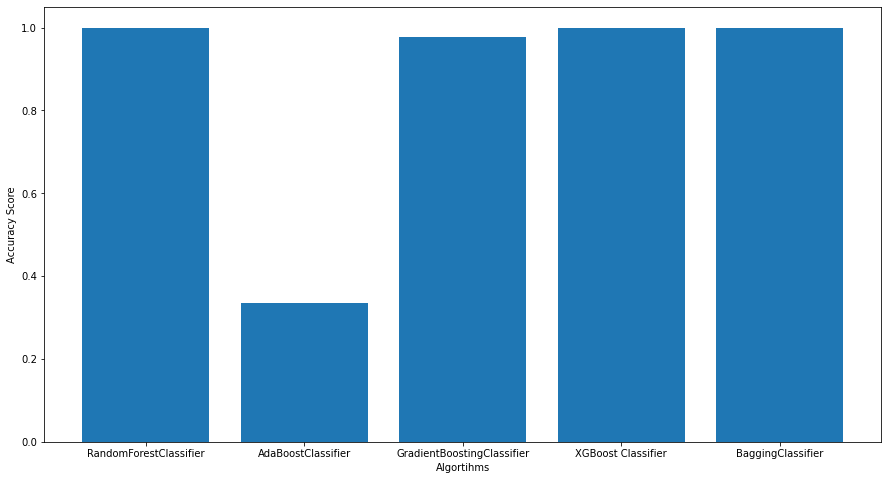

In [59]:
# Lets plot a bar graph to compare all the models accuracy
acc = [acc_RF, acc_AB, acc_GB, acc_XG, acc_BC]
ax = plt.figure(figsize=(15, 8))
plt.bar([
    'RandomForestClassifier', 'AdaBoostClassifier',
    'GradientBoostingClassifier', 'XGBoost Classifier', 'BaggingClassifier'
],
        acc,
        label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()